<a href="https://colab.research.google.com/github/jan-zika/computer_vision/blob/main/image_manipulation_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from urllib.request import urlopen

#Image manipulation

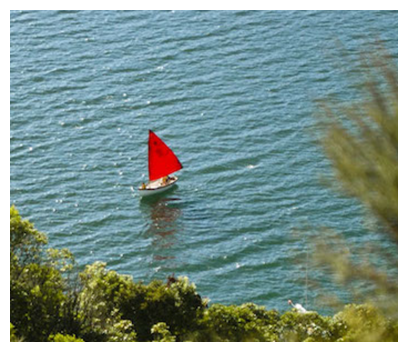

In [3]:
# Load the image from URL
url_1 = 'https://raw.githubusercontent.com/jan-zika/computer_vision/refs/heads/main/images/New_Zealand_Boat.jpg'

# Use urlopen to get the image data and cv2.imdecode to read it
try:
    resp = urlopen(url_1)
    image_array = np.asarray(bytearray(resp.read()), dtype="uint8")
    img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Could not load image from {url_1}")
    else:
        # 1. Crop the image (you’ll have to adjust coordinates to your sailboat region)
        # Format: img[y_start:y_end, x_start:x_end]
        # Adjusted coordinates based on visual inspection of the image
        cropped = img[100:400, 150:500]

        # 2. Resize by factor of 2
        resized = cv2.resize(cropped, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

        # 3. Flip horizontally
        flipped = cv2.flip(resized, 1)   # 1 = horizontal flip, 0 = vertical, -1 = both

        # 4. Display the result
        plt.figure(figsize=(5, 5))
        plt.imshow(flipped[:, :, ::-1])  # OpenCV loads BGR, so we reverse to RGB
        plt.axis("off")
        plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

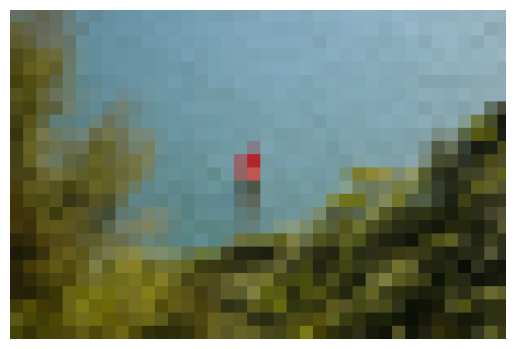

In [4]:
# Pixel art effect
# Reduce detail by averaging colors in blocks.

def pixel_art(image, block_size=10):
    h, w, _ = image.shape
    out = image.copy()
    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            block = image[y:y+block_size, x:x+block_size]
            color = block.mean(axis=(0,1)).astype(int)   # average color
            out[y:y+block_size, x:x+block_size] = color
    return out

pix = pixel_art(img, block_size=20)
plt.imshow(pix[:, :, ::-1])
plt.axis("off")
plt.show()

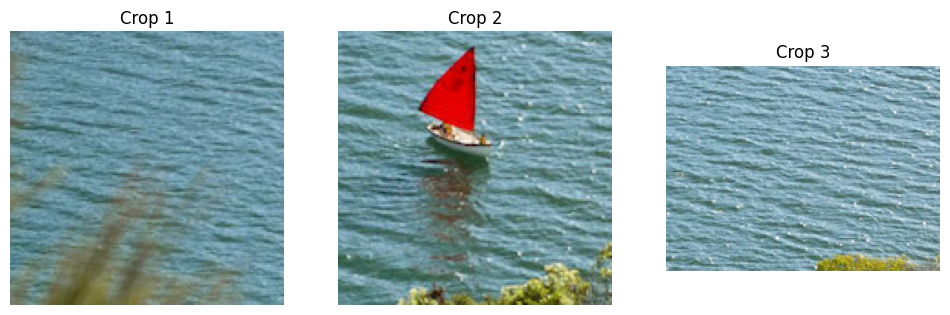

In [5]:
# 2. Multiple crops in a grid
# Take several regions and show them together.

# Define crops
crop1 = img[50:200, 100:250]
crop2 = img[200:350, 300:450]
crop3 = img[100:250, 400:600]

# Show in a grid
fig, axs = plt.subplots(1, 3, figsize=(12,4))
for ax, crop, title in zip(axs, [crop1, crop2, crop3], ["Crop 1", "Crop 2", "Crop 3"]):
    ax.imshow(crop[:,:,::-1])
    ax.set_title(title)
    ax.axis("off")
plt.show()

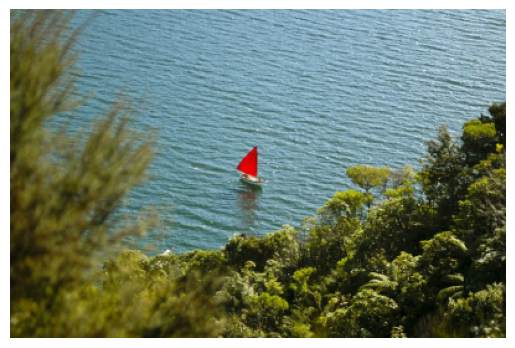

In [6]:
# 3. Resize while keeping aspect ratio
# Function that rescales to a target width.

def resize_keep_aspect(image, target_width):
    h, w = image.shape[:2]
    scale = target_width / w
    new_size = (target_width, int(h * scale))
    return cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)

resized = resize_keep_aspect(img, 400)
plt.imshow(resized[:,:,::-1])
plt.axis("off")
plt.show()

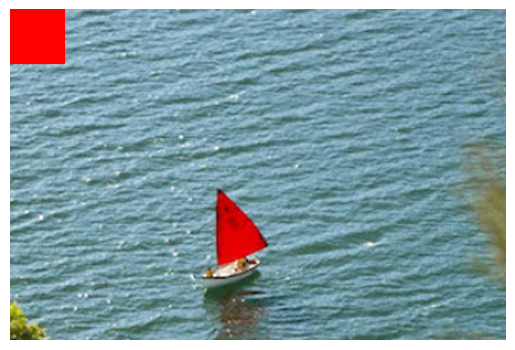

In [7]:
# Combined transformations
# Crop → resize → flip → modify pixels.

# Crop
crop = img[100:300, 200:500]

# Resize
resized = cv2.resize(crop, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

# Flip
flipped = cv2.flip(resized, 1)

# Modify pixels: draw a red square in top-left
flipped[0:50, 0:50] = [0, 0, 255]

plt.imshow(flipped[:,:,::-1])
plt.axis("off")
plt.show()

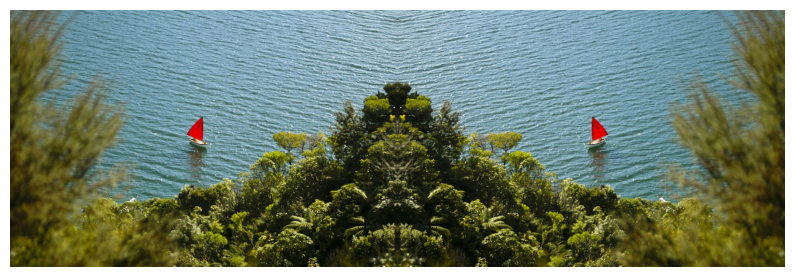

In [8]:
# 5. Mirrored collage
# Original + flipped side by side.

flipped = cv2.flip(img, 1)
collage = np.hstack((img, flipped))

plt.figure(figsize=(10,5))
plt.imshow(collage[:,:,::-1])
plt.axis("off")
plt.show()